# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


len(cities) 

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [19]:
data= []
counter = 0


for city in cities [:500]:
    response = requests.get(url+ city +"&units=imperial" + "&appid=" + weather_api_key)
    weather_json = response.json()
    counter = counter + 1
    try: 
        
        country = weather_json['sys']['country']  
        cloudiness = weather_json['clouds']['all']
        date= weather_json['dt']
        humidity = weather_json['main']['humidity']
        latitude= weather_json['coord']['lat']
        longitude= weather_json['coord']['lon']
        max_temp= weather_json['main']['temp_max']
        wind_speed= weather_json['wind']['speed']
        data.append([city, country, cloudiness, humidity, latitude, longitude, max_temp, wind_speed])
        time.sleep(.2)
        print(f"{city} {counter}")
    except:
        print("City not found")
        

hermanus 1
bluff 2
faya 3
busselton 4
zabol 5
City not found
qaanaaq 7
City not found
zhangye 9
nikolskoye 10
santa isabel do rio negro 11
sao sepe 12
meadow lake 13
georgetown 14
east london 15
saskylakh 16
ambalavao 17
ushuaia 18
City not found
hilo 20
punta arenas 21
talnakh 22
butaritari 23
mae tha 24
tuktoyaktuk 25
rikitea 26
alto araguaia 27
sudak 28
albany 29
hofn 30
acari 31
City not found
port elizabeth 33
solnechnyy 34
City not found
bethel 36
mount gambier 37
yellowknife 38
rawson 39
leh 40
clyde river 41
pisco 42
bubaque 43
balkanabat 44
ribeira grande 45
City not found
City not found
north bend 48
kapaa 49
cape town 50
novyy urgal 51
new norfolk 52
beverley 53
auki 54
kashi 55
vaini 56
viedma 57
katherine 58
rafaela 59
chokurdakh 60
atuona 61
bambous virieux 62
saint-philippe 63
warrnambool 64
sao felix do xingu 65
leningradskiy 66
lagunas 67
yatou 68
sehithwa 69
kodiak 70
rosetta 71
City not found
hami 73
rudbar 74
kefamenanu 75
ampanihy 76
muli 77
City not found
odweyne 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df= pd.DataFrame (data, columns= ["city", "country", "cloudiness", "humidity", "latitude", "longitude", "max_temp", "wind_speed"])


city_df.to_csv(output_data_file, index=None, header=True)
city_df.head()

,city,country,cloudiness,humidity,latitude,longitude,max_temp,wind_speed
0,hermanus,ZA,0,48,-34.4187,19.2345,78.01,8.99
1,bluff,NZ,90,92,-46.6000,168.3333,43.00,12.62
2,faya,SA,40,25,18.3851,42.4509,75.20,11.50
3,busselton,AU,51,89,-33.6500,115.3333,57.00,7.63
4,zabol,AF,88,34,32.2500,67.2500,61.88,7.16


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

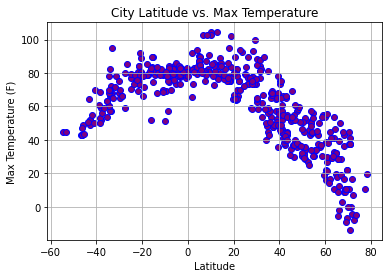

In [21]:
# create scatter 
plt.scatter(city_df["latitude"], city_df["max_temp"], c="purple", edgecolor="blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")

#Save Image
plt.savefig("LatTemp.png")
plt.show()


## Latitude vs. Humidity Plot

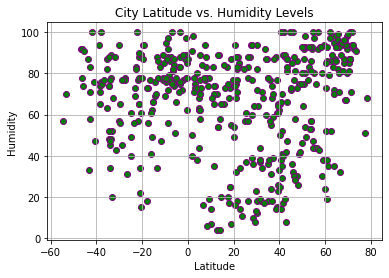

In [22]:
plt.scatter(city_df["latitude"], city_df["humidity"], c="green", edgecolor="purple")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity Levels")

#Save Image
plt.savefig("humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

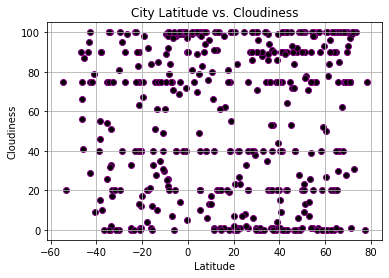

In [23]:
plt.scatter(city_df["latitude"], city_df["cloudiness"], c="black", edgecolor="purple")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness")

#Save Image
plt.savefig("Latcloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

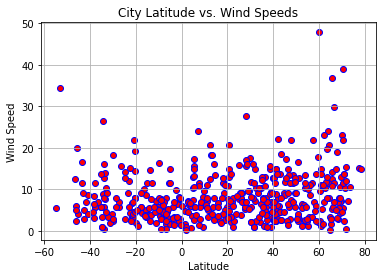

In [24]:
plt.scatter(city_df["latitude"], city_df["wind_speed"], c="red", edgecolor="blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speeds")

#Save Image
plt.savefig("Windspeed.png")
plt.show()

## Linear Regression

In [26]:
upper_df = city_df.loc[pd.to_numeric(city_df["latitude"]).astype(float) > 0, :]
lower_df = city_df.loc[pd.to_numeric(city_df["latitude"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.08x + 97.45
The r-squared is: -0.8735365121716138


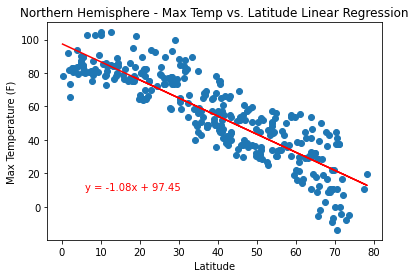

In [30]:
x_values = pd.to_numeric(upper_df['latitude']).astype(float)
y_values = pd.to_numeric(upper_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.62x + 85.48
The r-squared is: 0.7238915421308001


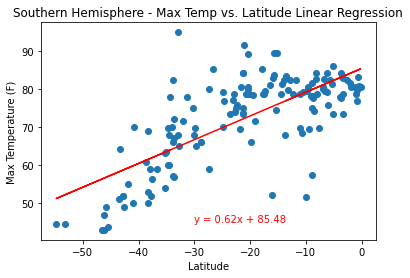

In [77]:
x_values = pd.to_numeric(lower_df['latitude']).astype(float)
y_values = pd.to_numeric(lower_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 51.23
The r-squared is: 0.2732447635690044


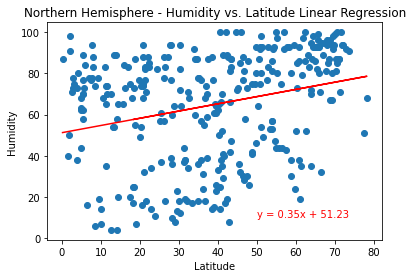

In [55]:
x_values = pd.to_numeric(upper_df['latitude']).astype(float)
y_values = pd.to_numeric(upper_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 77.03
The r-squared is: 0.1695834411482083


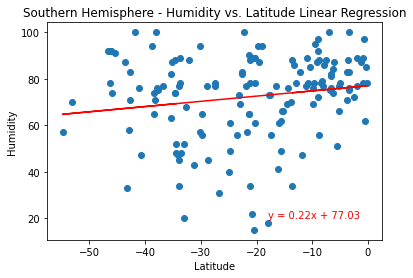

In [69]:
x_values = pd.to_numeric(lower_df['latitude']).astype(float)
y_values = pd.to_numeric(lower_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 47.98
The r-squared is: 0.09724499063006735


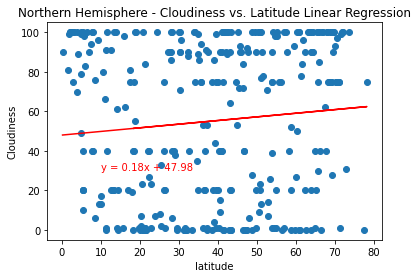

In [51]:
x_values = pd.to_numeric(upper_df['latitude']).astype(float)
y_values = pd.to_numeric(upper_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 62.27
The r-squared is: 0.13465998343182164


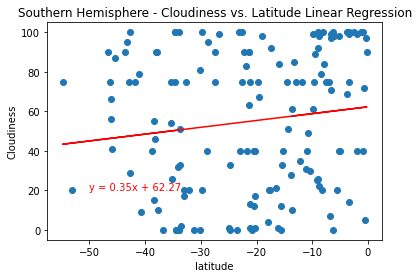

In [68]:
x_values = pd.to_numeric(lower_df['latitude']).astype(float)
y_values = pd.to_numeric(lower_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,20), color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 6.74
The r-squared is: 0.17070974248979606


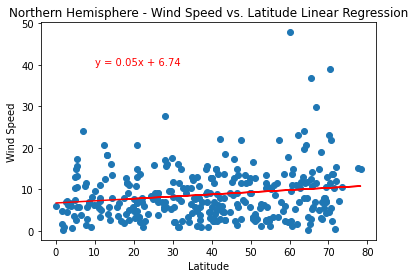

In [48]:
x_values = pd.to_numeric(upper_df['latitude']).astype(float)
y_values = pd.to_numeric(upper_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 4.82
The r-squared is: -0.2716910137565424


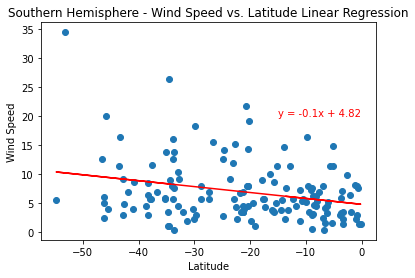

In [63]:
x_values = pd.to_numeric(lower_df['latitude']).astype(float)
y_values = pd.to_numeric(lower_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,20),color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")